In [ ]:
# Análisis de Resultados de Benchmark en VM

En esta sección vamos a:

- Leer los archivos de resultados generados por las pruebas de benchmark en la máquina virtual (VM).
- Extraer los datos clave de cada prueba: CPU, memoria, disco y tiempo de arranque.
- Presentar un resumen de los resultados en forma de valores numéricos.
- Preparar estos datos para futuras comparaciones con los resultados obtenidos en Docker.

Esta etapa es fundamental para entender el rendimiento de la VM antes de comparar con el contenedor Docker.

In [1]:
import re
import pandas as pd

results_path = "/home/flez/MyNotebook/vm_vs_docker_benchmark/results/"

def parse_memory_benchmark(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    throughput_match = re.search(r"(\d+\.\d+) MiB/sec", content)
    throughput = float(throughput_match.group(1)) if throughput_match else None

    latency_match = re.search(r"avg:\s+(\d+\.\d+)", content)
    latency = float(latency_match.group(1)) if latency_match else None

    return {
        "throughput_MiB_per_s": throughput,
        "avg_latency_ms": latency,
    }

def parse_disk_benchmark(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    reads_per_sec = re.search(r"reads/s:\s+(\d+\.\d+)", content)
    writes_per_sec = re.search(r"writes/s:\s+(\d+\.\d+)", content)
    read_throughput = re.search(r"read, MiB/s:\s+(\d+\.\d+)", content)
    write_throughput = re.search(r"written, MiB/s:\s+(\d+\.\d+)", content)
    avg_latency = re.search(r"avg:\s+(\d+\.\d+)", content)

    return {
        "reads_per_sec": float(reads_per_sec.group(1)) if reads_per_sec else None,
        "writes_per_sec": float(writes_per_sec.group(1)) if writes_per_sec else None,
        "read_throughput_MiB_per_s": float(read_throughput.group(1)) if read_throughput else None,
        "write_throughput_MiB_per_s": float(write_throughput.group(1)) if write_throughput else None,
        "avg_latency_ms": float(avg_latency.group(1)) if avg_latency else None,
    }

def parse_cpu_benchmark(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    events_per_sec = re.search(r"events per second:\s+(\d+\.\d+)", content)
    avg_latency = re.search(r"avg:\s+(\d+\.\d+)", content)

    return {
        "events_per_sec": float(events_per_sec.group(1)) if events_per_sec else None,
        "avg_latency_ms": float(avg_latency.group(1)) if avg_latency else None,
    }

def parse_boot_time(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    m = re.search(r"Startup finished in ([\d\.]+)s \(kernel\) \+ ([\d\.]+)s \(userspace\) = ([\d\.]+)s", content)

    if m:
        kernel = float(m.group(1))
        userspace = float(m.group(2))
        total = float(m.group(3))
        return {"kernel_s": kernel, "userspace_s": userspace, "total_s": total}
    else:
        return None

vm_memory = parse_memory_benchmark(results_path + "vm_memory_benchmark.txt")
vm_disk = parse_disk_benchmark(results_path + "vm_disk_benchmark.txt")
vm_cpu = parse_cpu_benchmark(results_path + "vm_cpu_benchmark.txt")
vm_boot = parse_boot_time(results_path + "vm_boot_time.txt")

print("=== Resultados VM ===")
print("Memoria:", vm_memory)
print("Disco:", vm_disk)
print("CPU:", vm_cpu)
print("Boot time:", vm_boot)

=== Resultados VM ===
Memoria: {'throughput_MiB_per_s': 4536.36, 'avg_latency_ms': 0.0}
Disco: {'reads_per_sec': 447.81, 'writes_per_sec': 298.54, 'read_throughput_MiB_per_s': 7.0, 'write_throughput_MiB_per_s': 4.66, 'avg_latency_ms': 0.58}
CPU: {'events_per_sec': 836.47, 'avg_latency_ms': 1.19}
Boot time: {'kernel_s': 3.78, 'userspace_s': 24.415, 'total_s': 28.196}


In [ ]:
# Análisis de Resultados de Benchmark en Docker

En esta sección vamos a:

- Leer los archivos de resultados generados por las pruebas de benchmark en el contenedor Docker.
- Extraer los datos clave de cada prueba: CPU, memoria, disco y tiempo de arranque.
- Presentar un resumen de los resultados en forma de valores numéricos.
- Comparar estos datos con los resultados obtenidos en la máquina virtual (VM).

Este análisis nos permitirá evaluar las diferencias de rendimiento entre Docker y la VM.

In [3]:
import re
import pandas as pd

results_path = "/home/flez/MyNotebook/vm_vs_docker_benchmark/results/"

def parse_memory_benchmark(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    throughput_match = re.search(r"(\d+\.\d+) MiB/sec", content)
    throughput = float(throughput_match.group(1)) if throughput_match else None

    latency_match = re.search(r"avg:\s+(\d+\.\d+)", content)
    latency = float(latency_match.group(1)) if latency_match else None

    return {
        "throughput_MiB_per_s": throughput,
        "avg_latency_ms": latency,
    }

def parse_disk_benchmark(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    reads_per_sec = re.search(r"reads/s:\s+(\d+\.\d+)", content)
    writes_per_sec = re.search(r"writes/s:\s+(\d+\.\d+)", content)
    read_throughput = re.search(r"read, MiB/s:\s+(\d+\.\d+)", content)
    write_throughput = re.search(r"written, MiB/s:\s+(\d+\.\d+)", content)
    avg_latency = re.search(r"avg:\s+(\d+\.\d+)", content)

    return {
        "reads_per_sec": float(reads_per_sec.group(1)) if reads_per_sec else None,
        "writes_per_sec": float(writes_per_sec.group(1)) if writes_per_sec else None,
        "read_throughput_MiB_per_s": float(read_throughput.group(1)) if read_throughput else None,
        "write_throughput_MiB_per_s": float(write_throughput.group(1)) if write_throughput else None,
        "avg_latency_ms": float(avg_latency.group(1)) if avg_latency else None,
    }

def parse_cpu_benchmark(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    events_per_sec = re.search(r"events per second:\s+(\d+\.\d+)", content)
    avg_latency = re.search(r"avg:\s+(\d+\.\d+)", content)

    return {
        "events_per_sec": float(events_per_sec.group(1)) if events_per_sec else None,
        "avg_latency_ms": float(avg_latency.group(1)) if avg_latency else None,
    }

def parse_docker_boot_time(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
    
    boot_time_match = re.search(r"Tiempo de arranque de contenedor Docker:\s+([\d\.]+)\s+segundos", content)
    boot_time = float(boot_time_match.group(1)) if boot_time_match else None
    
    return {"total_s": boot_time}

docker_memory = parse_memory_benchmark(results_path + "docker_memory_benchmark.txt")
docker_disk = parse_disk_benchmark(results_path + "docker_disk_benchmark.txt")
docker_cpu = parse_cpu_benchmark(results_path + "docker_cpu_benchmark.txt")
docker_boot = parse_docker_boot_time(results_path + "docker_boot_time.txt")

print("=== Resultados Docker ===")
print("Memoria:", docker_memory)
print("Disco:", docker_disk)
print("CPU:", docker_cpu)
print("Boot time:", docker_boot)

=== Resultados Docker ===
Memoria: {'throughput_MiB_per_s': 4660.1, 'avg_latency_ms': 0.0}
Disco: {'reads_per_sec': 494.29, 'writes_per_sec': 329.53, 'read_throughput_MiB_per_s': 7.72, 'write_throughput_MiB_per_s': 5.15, 'avg_latency_ms': 0.53}
CPU: {'events_per_sec': 849.49, 'avg_latency_ms': 1.18}
Boot time: {'total_s': 1.024}


In [ ]:
Comparacion de Benchmarks
- Preparación de datos:
- Cargar los resultados de los benchmarks de VM y Docker en un DataFrame.
- Estandarizar las métricas para una mejor comparación.

In [5]:
import pandas as pd

vm_data = {
    "Metric": ["CPU (Events/sec)", "CPU (Latency ms)", 
               "Memory (Throughput MiB/s)", "Memory (Latency ms)", 
               "Disk (Reads/sec)", "Disk (Writes/sec)", 
               "Disk (Read Throughput MiB/s)", "Disk (Write Throughput MiB/s)", 
               "Disk (Latency ms)", "Boot Time (s)"],
    "VM": [
        vm_cpu.get("events_per_sec"),
        vm_cpu.get("avg_latency_ms"),
        vm_memory.get("throughput_MiB_per_s"),
        vm_memory.get("avg_latency_ms"),
        vm_disk.get("reads_per_sec"),
        vm_disk.get("writes_per_sec"),
        vm_disk.get("read_throughput_MiB_per_s"),
        vm_disk.get("write_throughput_MiB_per_s"),
        vm_disk.get("avg_latency_ms"),
        vm_boot.get("total_s")
    ]
}

docker_data = {
    "Docker": [
        docker_cpu.get("events_per_sec"),
        docker_cpu.get("avg_latency_ms"),
        docker_memory.get("throughput_MiB_per_s"),
        docker_memory.get("avg_latency_ms"),
        docker_disk.get("reads_per_sec"),
        docker_disk.get("writes_per_sec"),
        docker_disk.get("read_throughput_MiB_per_s"),
        docker_disk.get("write_throughput_MiB_per_s"),
        docker_disk.get("avg_latency_ms"),
        docker_boot.get("total_s")
    ]
}

df_comparison = pd.DataFrame(vm_data).join(pd.DataFrame(docker_data))

output_path = "/home/flez/MyNotebook/vm_vs_docker_benchmark/results/comparison_vm_docker.csv"

df_comparison.to_csv(output_path, index=False)

print(f"Resultados guardados correctamente en: {output_path}")
df_comparison

Resultados guardados correctamente en: /home/flez/MyNotebook/vm_vs_docker_benchmark/results/comparison_vm_docker.csv


,Metric,VM,Docker
0,CPU (Events/sec),836.470,849.490
1,CPU (Latency ms),1.190,1.180
2,Memory (Throughput MiB/s),4536.360,4660.100
3,Memory (Latency ms),0.000,0.000
4,Disk (Reads/sec),447.810,494.290
5,Disk (Writes/sec),298.540,329.530
6,Disk (Read Throughput MiB/s),7.000,7.720
7,Disk (Write Throughput MiB/s),4.660,5.150
8,Disk (Latency ms),0.580,0.530
9,Boot Time (s),28.196,1.024


In [ ]:
Visualización Gráfica de Benchmarks: VM vs Docker
- Gráficos de comparación:
- CPU Performance (Events/sec y Latencia)
- Memoria (Throughput y Latencia)
- Disco (Lecturas/escrituras por segundo y Throughput)
- Boot Time

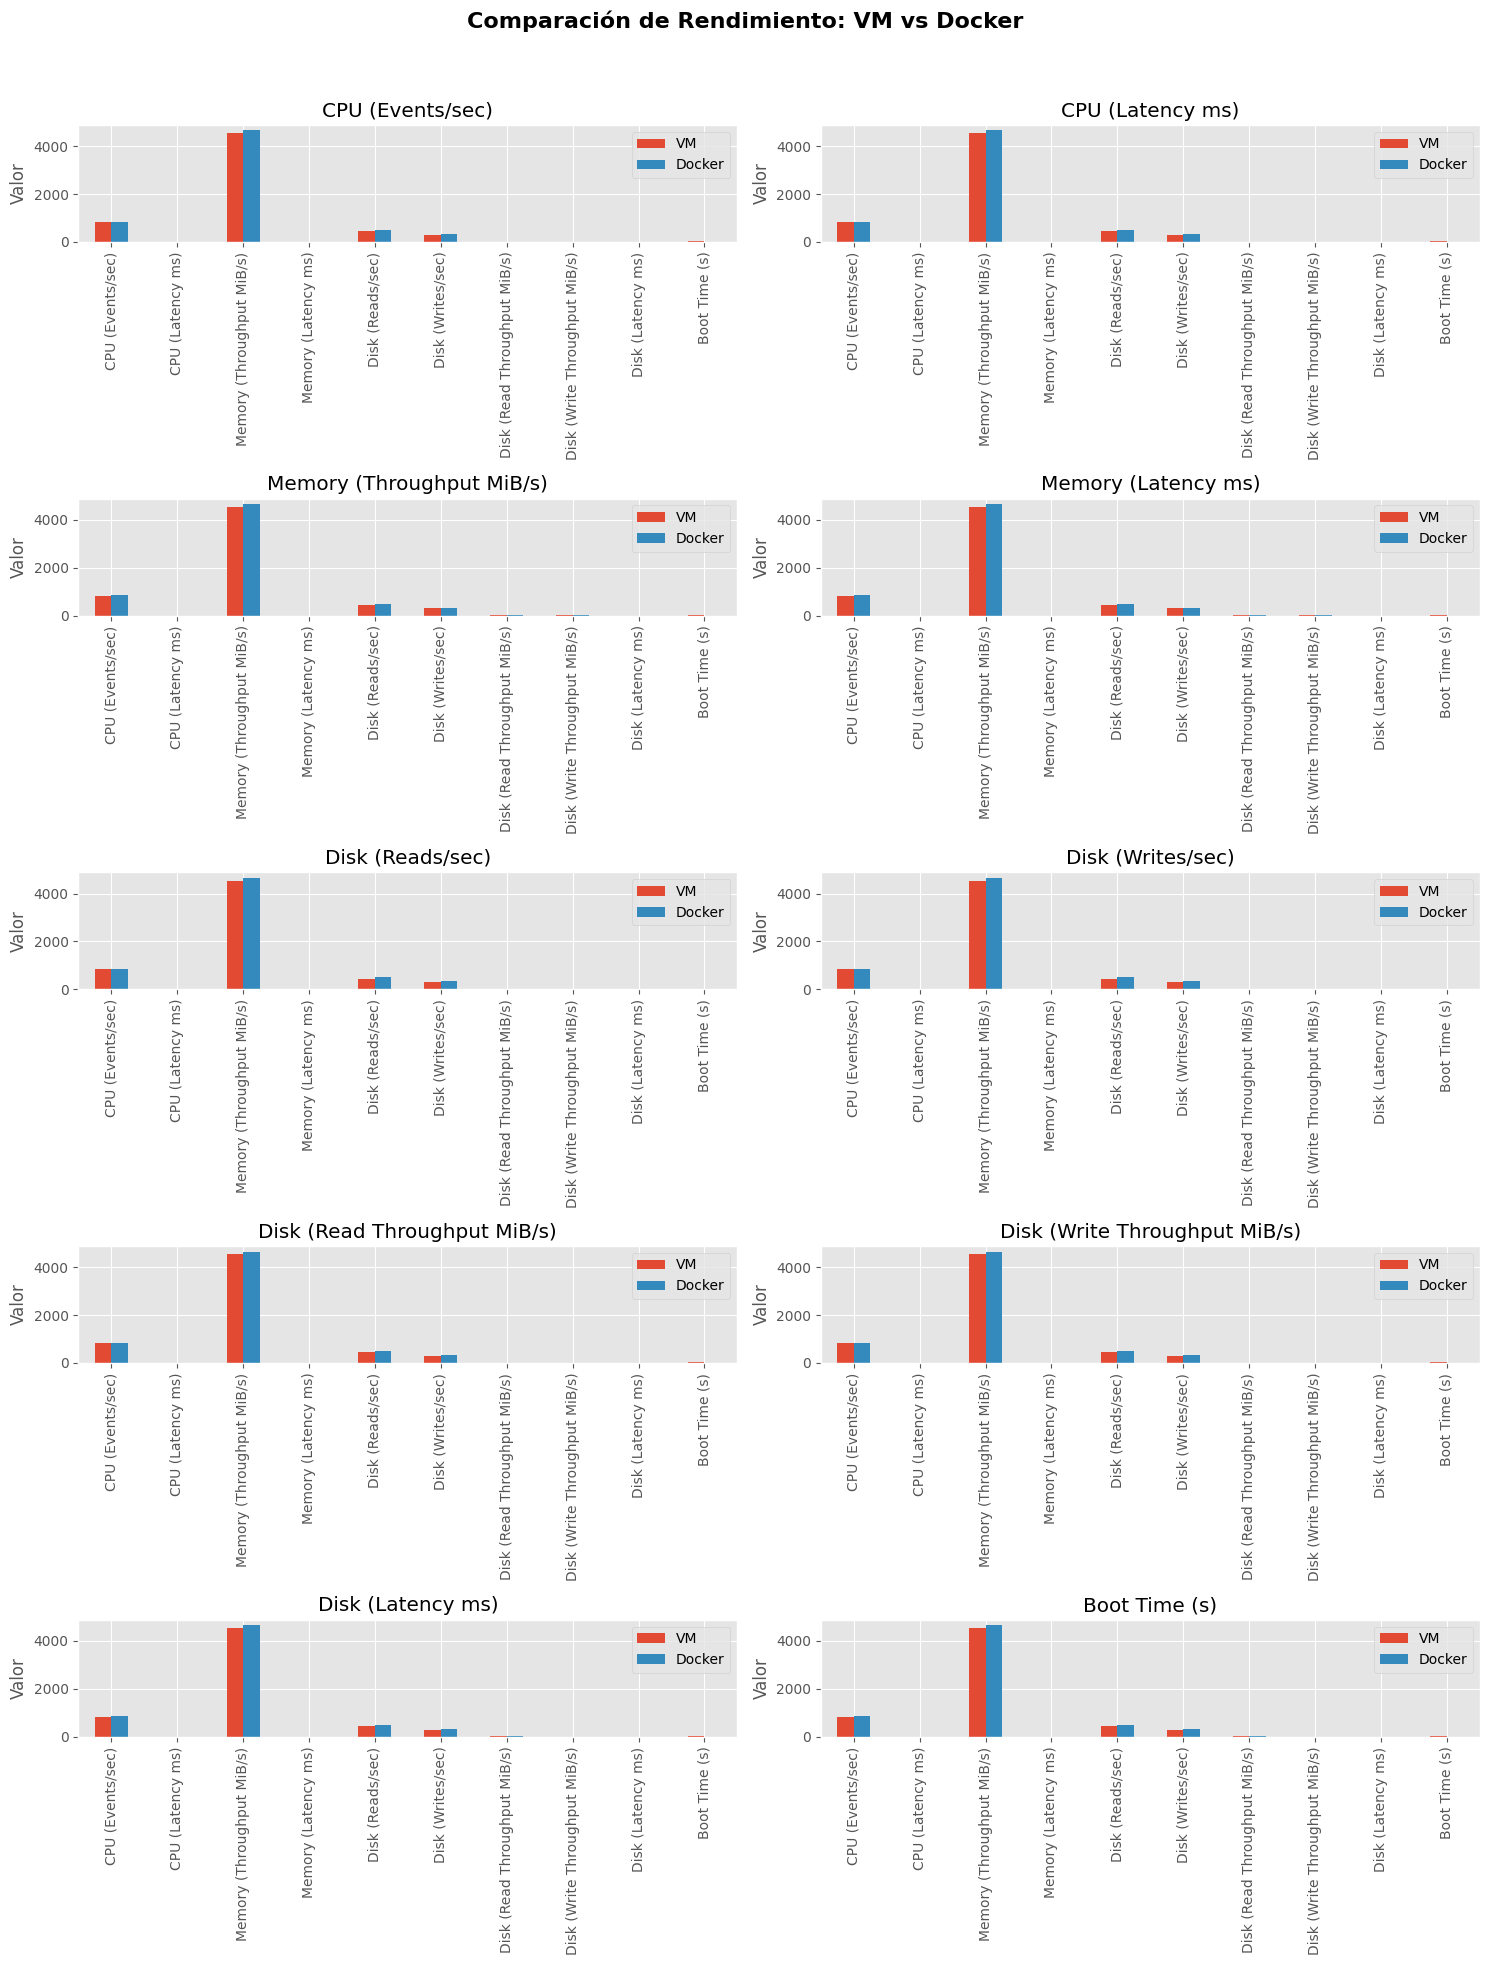

✅ Gráfica guardada correctamente en: /home/flez/MyNotebook/vm_vs_docker_benchmark/results/comparison_vm_docker.png


In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Comparación de Rendimiento: VM vs Docker', fontsize=16, fontweight='bold')

metrics = [
    ("CPU (Events/sec)", 0, 0),
    ("CPU (Latency ms)", 0, 1),
    ("Memory (Throughput MiB/s)", 1, 0),
    ("Memory (Latency ms)", 1, 1),
    ("Disk (Reads/sec)", 2, 0),
    ("Disk (Writes/sec)", 2, 1),
    ("Disk (Read Throughput MiB/s)", 3, 0),
    ("Disk (Write Throughput MiB/s)", 3, 1),
    ("Disk (Latency ms)", 4, 0),
    ("Boot Time (s)", 4, 1)
]

for metric, row, col in metrics:
    df_comparison.plot.bar(x='Metric', y=['VM', 'Docker'], ax=axes[row, col], legend=True)
    axes[row, col].set_title(metric)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Valor')
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

output_image_path = "/home/flez/MyNotebook/vm_vs_docker_benchmark/results/comparison_vm_docker.png"

fig.savefig(output_image_path)
print(f"✅ Gráfica guardada correctamente en: {output_image_path}")